In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

In [2]:
cd c:\\

[Errno 2] No such file or directory: 'c:\\'
/content


In [3]:
df=pd.read_csv("/content/archive (3).zip")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
print("Fraudulent Transactions - Transaction Amount")
print(df.Amount[df.Class == 1].describe())
print()
print("Normal Transactions - Transaction Amount")
print(df.Amount[df.Class == 0].describe())

Fraudulent Transactions - Transaction Amount
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal Transactions - Transaction Amount
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [8]:
print("Fraudulent Transactions - Transaction Amount")
print(df.Amount[df.Class == 1].describe())
print()

print("Normal Transactions - Transaction Amount")
print(df.Amount[df.Class == 0].describe())

Fraudulent Transactions - Transaction Amount
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal Transactions - Transaction Amount
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


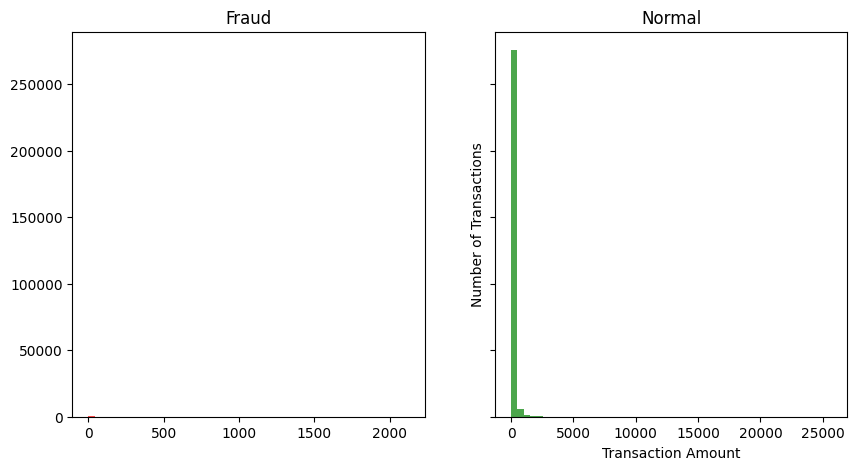

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))

bins = 50

ax1.hist(df.Amount[df.Class == 1], bins=bins, color='red', alpha=0.7)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins=bins, color='green', alpha=0.7)
ax2.set_title('Normal')

plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')
plt.show()

In [10]:
df.shape

(284807, 31)

In [11]:
print ("Fraud")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Amount[df.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


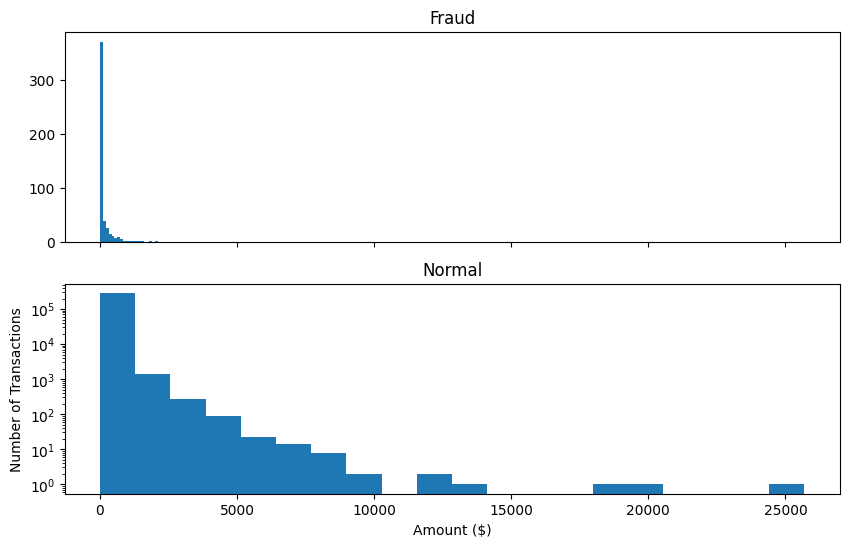

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,6))

bins = 20

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [13]:
df['Amount_max_fraud'] = np.where(df['Amount'] <= 2300, 0, 1)

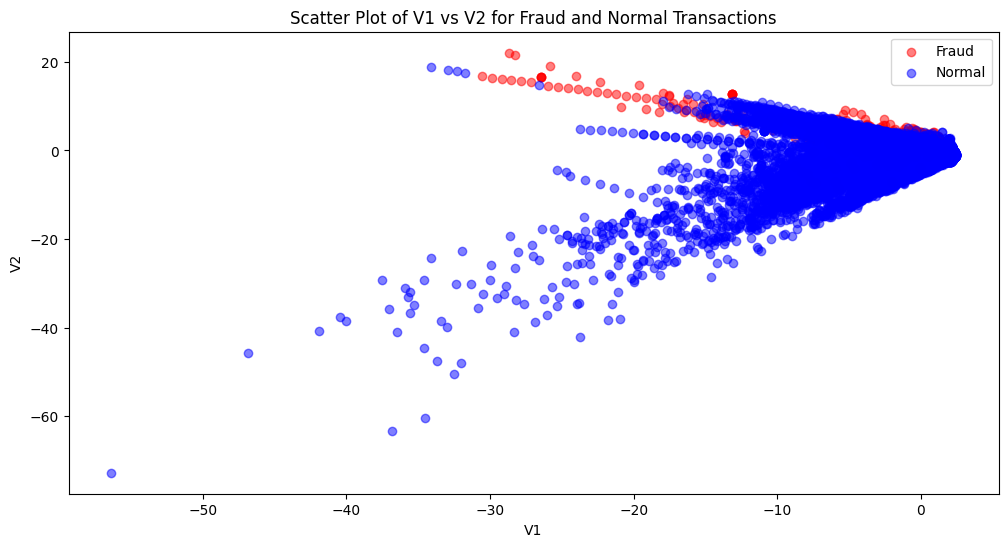

In [14]:
plt.figure(figsize=(12, 6))

# Scatter plot for Fraud transactions
plt.scatter(df[df['Class'] == 1]['V1'], df[df['Class'] == 1]['V2'], color='red', label='Fraud', alpha=0.5)

# Scatter plot for Normal transactions
plt.scatter(df[df['Class'] == 0]['V1'], df[df['Class'] == 0]['V2'], color='blue', label='Normal', alpha=0.5)

plt.title('Scatter Plot of V1 vs V2 for Fraud and Normal Transactions')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()
plt.show()

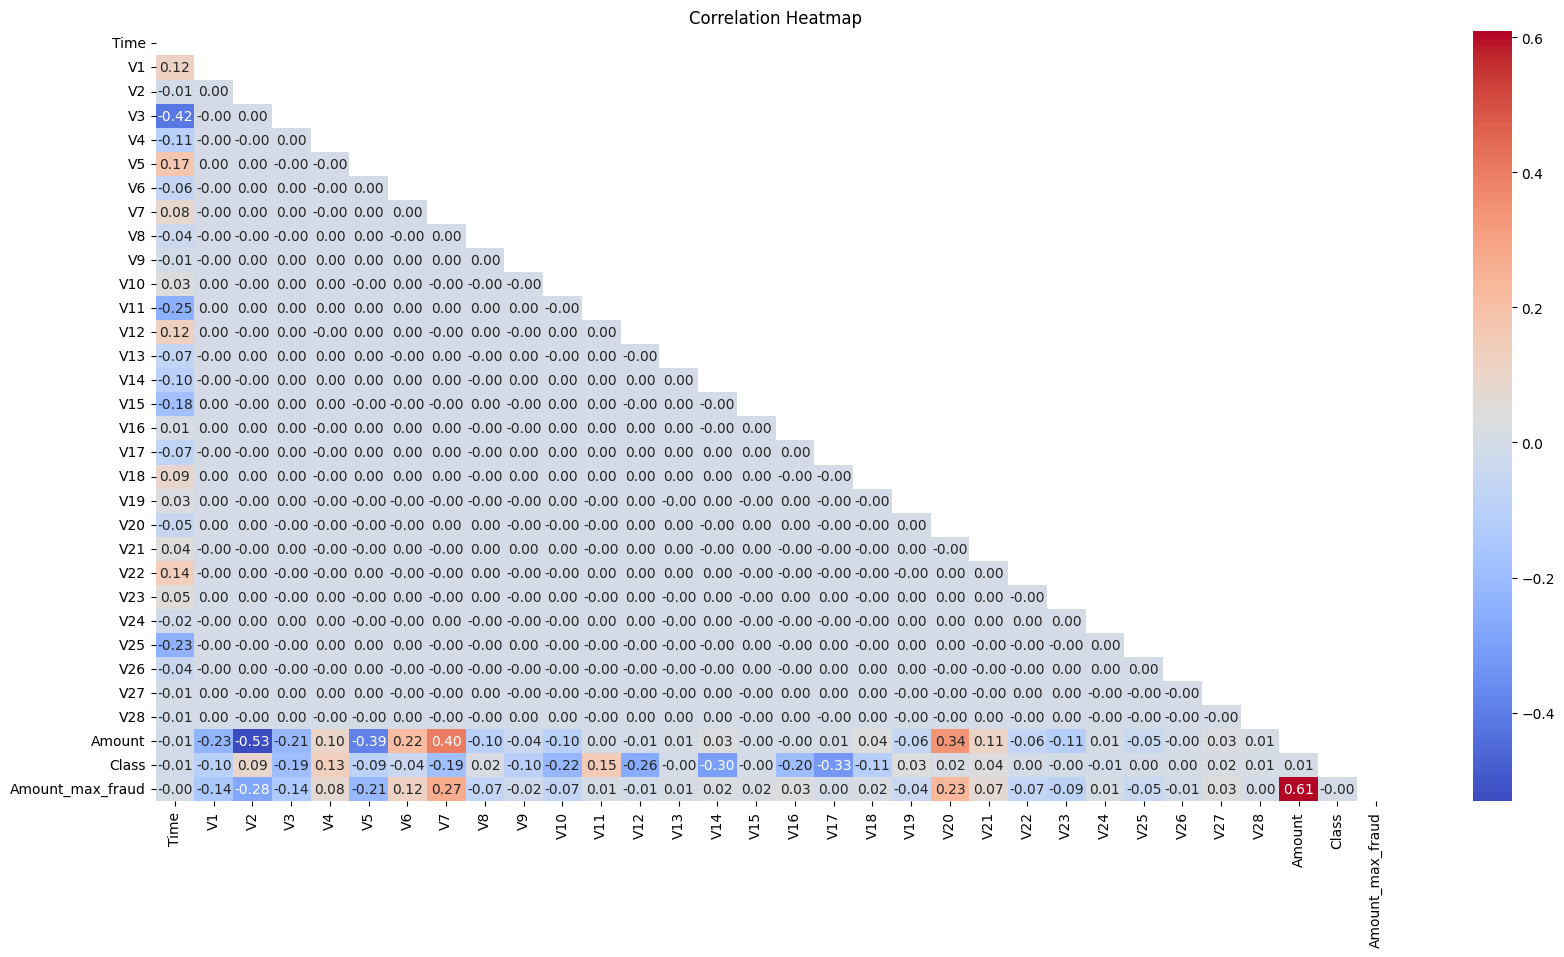

In [15]:
plt.figure(figsize=(20, 10))

# Calculate the correlation matrix
corr_matrix =df.corr()

# Create a mask to display only the lower triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Customize the heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

plt.title('Correlation Heatmap')
plt.show()

In [16]:
columns_exclude = ["Class"]

# Extracting columns excluding the specified ones
X = df.loc[:, df.columns.difference(columns_exclude)]
Y = df["Class"]

print(X.shape)
print(Y.shape)

(284807, 31)
(284807,)


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =42 )

In [18]:
fraud_count = len(df[df['Class'] == 1])
normal_count = len(df[df['Class'] == 0])

outlier_proportion = fraud_count / float(normal_count)

print("Proportion of outliers:", outlier_proportion)

Proportion of outliers: 0.0017304750013189597


In [19]:
model = IsolationForest(
    n_estimators=150,  # Number of base estimators
    max_samples='auto',  # Number of samples to draw for each base estimator
    contamination='auto',  # Proportion of outliers in the dataset
    random_state=42,  # Random seed for reproducibility
    verbose=2  # Verbosity level (0: silent, 1: progress bar, 2: detailed)
)

# Training the model
model.fit(X_train)


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

IsolationForest(n_estimators=150, random_state=42, verbose=2)

In [20]:
# Anomaly scores prediction
anomaly_scores = model.score_samples(X_test)

# Predictions based on anomaly scores
threshold = -0.5  # Adjust the threshold as needed
y_pred = [1 if score < threshold else 0 for score in anomaly_scores]

In [21]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y_test).sum()

In [22]:
# Calculate Isolation Forest and print number of errors
print(f"Isolation Forest {n_errors}")

# Calculate and print Accuracy Score
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, y_pred))git

Isolation Forest 2041
Accuracy Score: 0.9641690951862645
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.83      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.90      0.53     56962
weighted avg       1.00      0.96      0.98     56962

